# Tarea: Mejora de la Calidad de Imágenes y Filtrado Espacial

**Nombre:** Alan Garcia Diaz

## Resumen

En este notebook, se aplican diversas técnicas de preprocesamiento y mejora a un conjunto de cuatro imágenes. Los pasos incluyen la conversión a escala de grises, el análisis de los niveles de intensidad, el ajuste de contraste mediante normalización y la aplicación de filtros espaciales (media, mediana, mínimo y máximo) para observar sus efectos en la calidad y características de las imágenes.

## 1. Importación de Librerías

Primero, importamos las librerías necesarias para el procesamiento de imágenes y la visualización de datos.
- **OpenCV (`cv2`)**: Para leer, convertir y aplicar filtros a las imágenes.
- **NumPy**: Para la manipulación eficiente de arreglos y matrices.
- **Matplotlib**: Para mostrar las imágenes directamente en el notebook.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Configurar matplotlib para mostrar las imágenes en el notebook
%matplotlib inline

## 2. Definición de Funciones Auxiliares

Se definen las funciones que se utilizarán a lo largo del análisis.

### Función `SubMatriz`

Esta función extrae una submatriz cuadrada de tamaño `k x k` de una imagen `img`, centrada en las coordenadas `(x, y)`.

In [2]:
def SubMatriz(img, centro, k):
    """
    Extrae una submatriz de tamaño k x k de una imagen.

    Args:
        img (np.array): La imagen de entrada.
        centro (tuple): Una tupla (x, y) con las coordenadas del centro.
        k (int): Un entero impar que indica el tamaño de la submatriz.

    Returns:
        np.array: La submatriz extraída.
    """
    if k % 2 == 0:
        raise ValueError("k debe ser un entero impar.")
    
    x, y = centro
    # Calculamos el radio a partir del tamaño k
    radio = k // 2
    
    # Obtenemos las dimensiones de la imagen
    alto, ancho = img.shape[:2]
    
    # Calculamos los límites de la submatriz, asegurando que no se salgan de la imagen
    x_min = max(0, x - radio)
    x_max = min(ancho, x + radio + 1)
    y_min = max(0, y - radio)
    y_max = min(alto, y + radio + 1)
    
    # Extraemos la submatriz usando slicing
    sub_mat = img[y_min:y_max, x_min:x_max]
    
    return sub_mat

### Funciones para Filtros Mínimo y Máximo

Estas funciones aplican los filtros mínimo y máximo a una imagen utilizando un kernel de tamaño `k x k`. Iteran sobre cada píxel, extraen su vecindad con `SubMatriz` y calculan el mínimo o máximo de esa vecindad para asignarlo al píxel correspondiente en la imagen de salida.

In [3]:
def aplicar_filtro_manual(img, k, tipo_filtro):
    """
    Aplica un filtro (mínimo o máximo) a una imagen usando la función SubMatriz.

    Args:
        img (np.array): La imagen de entrada en escala de grises.
        k (int): El tamaño del kernel (debe ser impar).
        tipo_filtro (str): 'min' para filtro mínimo, 'max' para filtro máximo.

    Returns:
        np.array: La imagen filtrada.
    """
    alto, ancho = img.shape
    img_filtrada = np.zeros_like(img)
    
    for y in range(alto):
        for x in range(ancho):
            vecindad = SubMatriz(img, (x, y), k)
            if tipo_filtro == 'min':
                img_filtrada[y, x] = np.min(vecindad)
            elif tipo_filtro == 'max':
                img_filtrada[y, x] = np.max(vecindad)
            else:
                raise ValueError("El tipo de filtro debe ser 'min' o 'max'.")
                
    return img_filtrada

## 3. Procesamiento y Análisis de Imágenes

A continuación, se procesará cada imagen siguiendo los pasos solicitados.

In [4]:
# Lista de nombres de archivo de las imágenes
ruta_carpeta = 'Imagenes'
nombres_imagenes = ['chest_xray.jpg', 'cat.jpg', 'forest.jpg', 'papyrus.png']

# Parámetros para los filtros (se pueden ajustar)
KERNEL_SIZE = 5 # Tamaño de la ventana para los filtros. Debe ser impar.

--- Procesando Imagen: chest_xray.jpg ---
1. Valor mínimo de gris: 0
   Valor máximo de gris: 255
2. Contraste ajustado por normalización.
3. Filtros de media y mediana aplicados con kernel 5x5.
4. Función SubMatriz definida.
5. Aplicando filtros mínimo y máximo con kernel 5x5. Esto puede tardar... ¡Hecho!


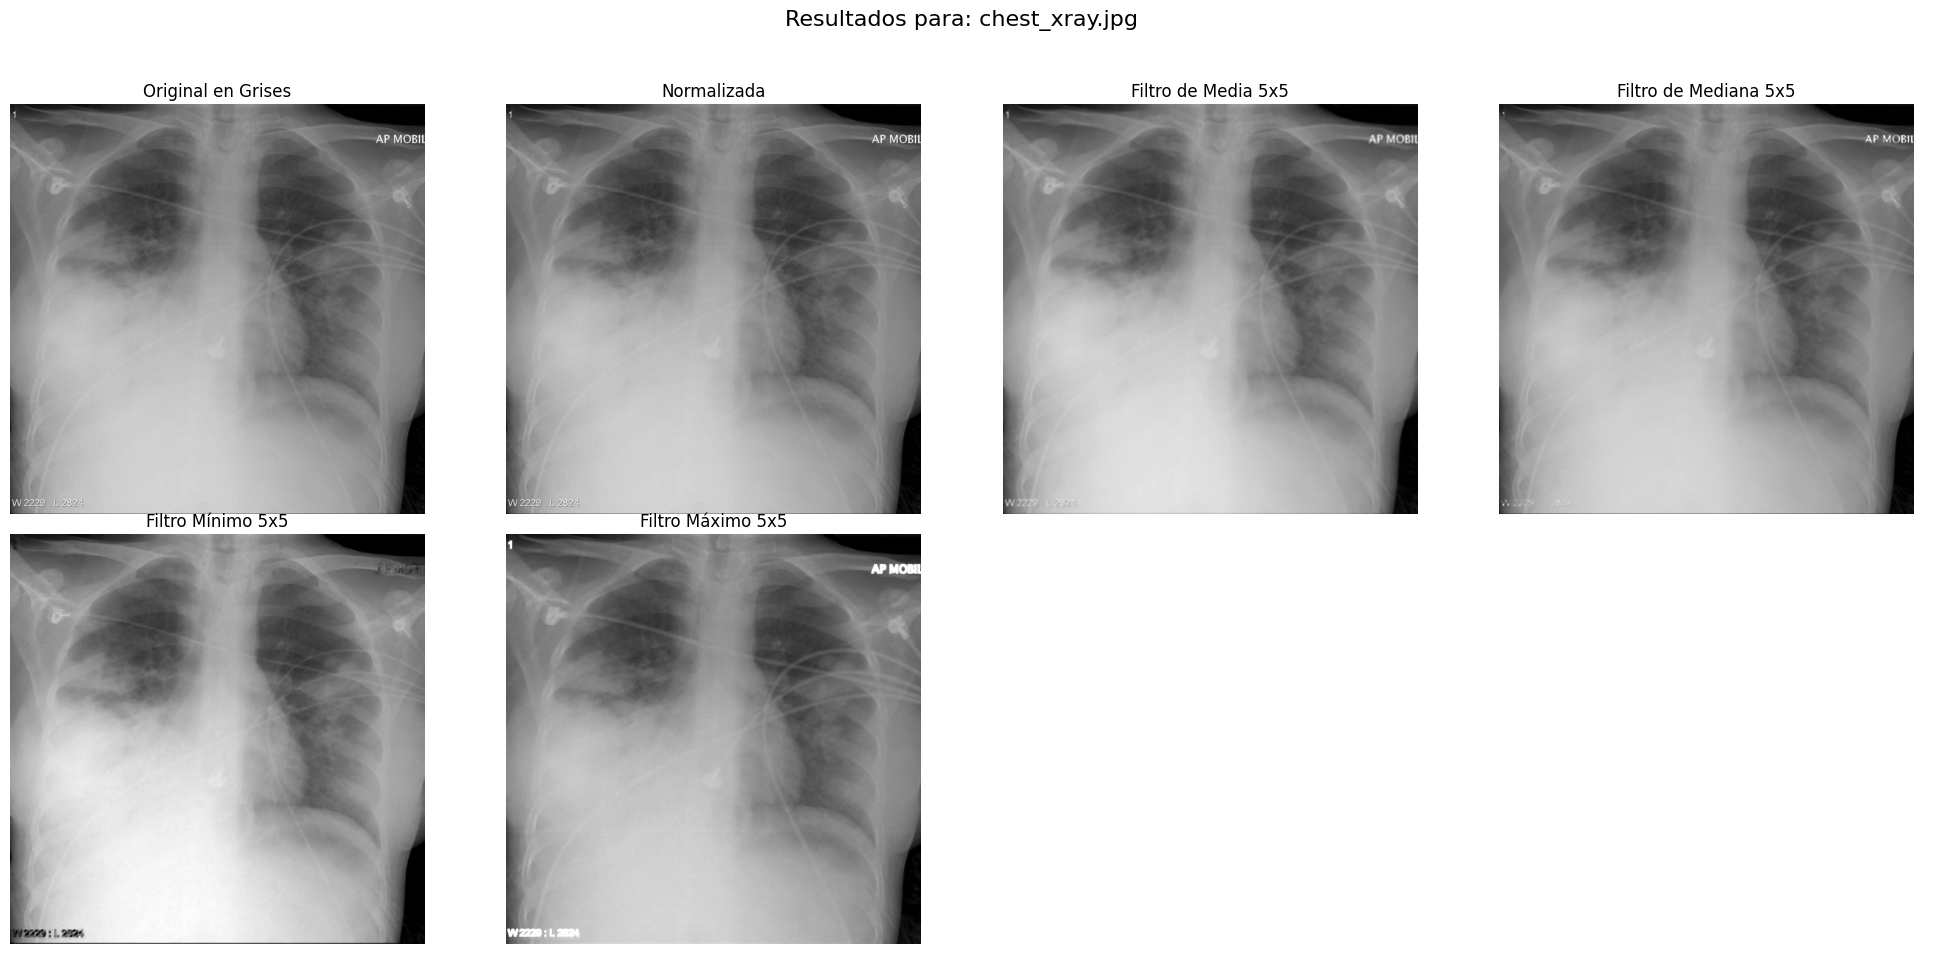



--- Procesando Imagen: cat.jpg ---
1. Valor mínimo de gris: 0
   Valor máximo de gris: 255
2. Contraste ajustado por normalización.
3. Filtros de media y mediana aplicados con kernel 5x5.
4. Función SubMatriz definida.
5. Aplicando filtros mínimo y máximo con kernel 5x5. Esto puede tardar... ¡Hecho!


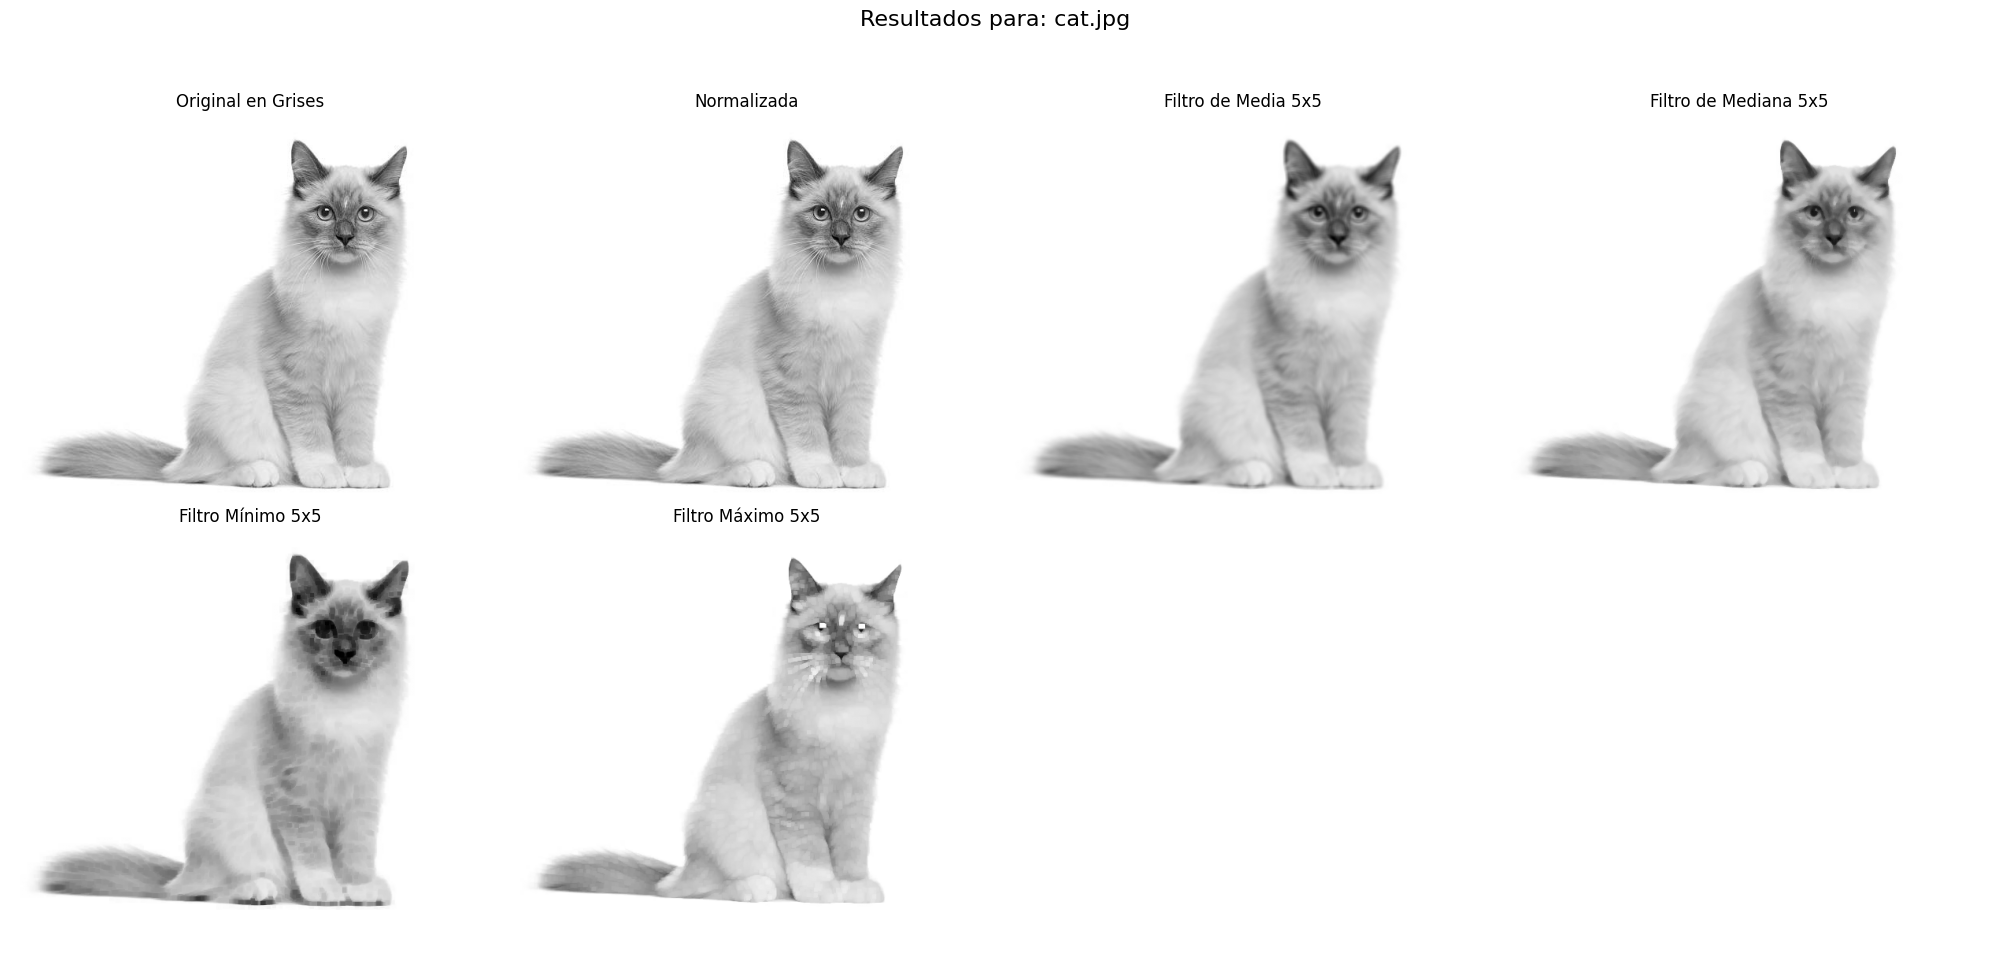



--- Procesando Imagen: forest.jpg ---
1. Valor mínimo de gris: 0
   Valor máximo de gris: 251
2. Contraste ajustado por normalización.
3. Filtros de media y mediana aplicados con kernel 5x5.
4. Función SubMatriz definida.
5. Aplicando filtros mínimo y máximo con kernel 5x5. Esto puede tardar... ¡Hecho!


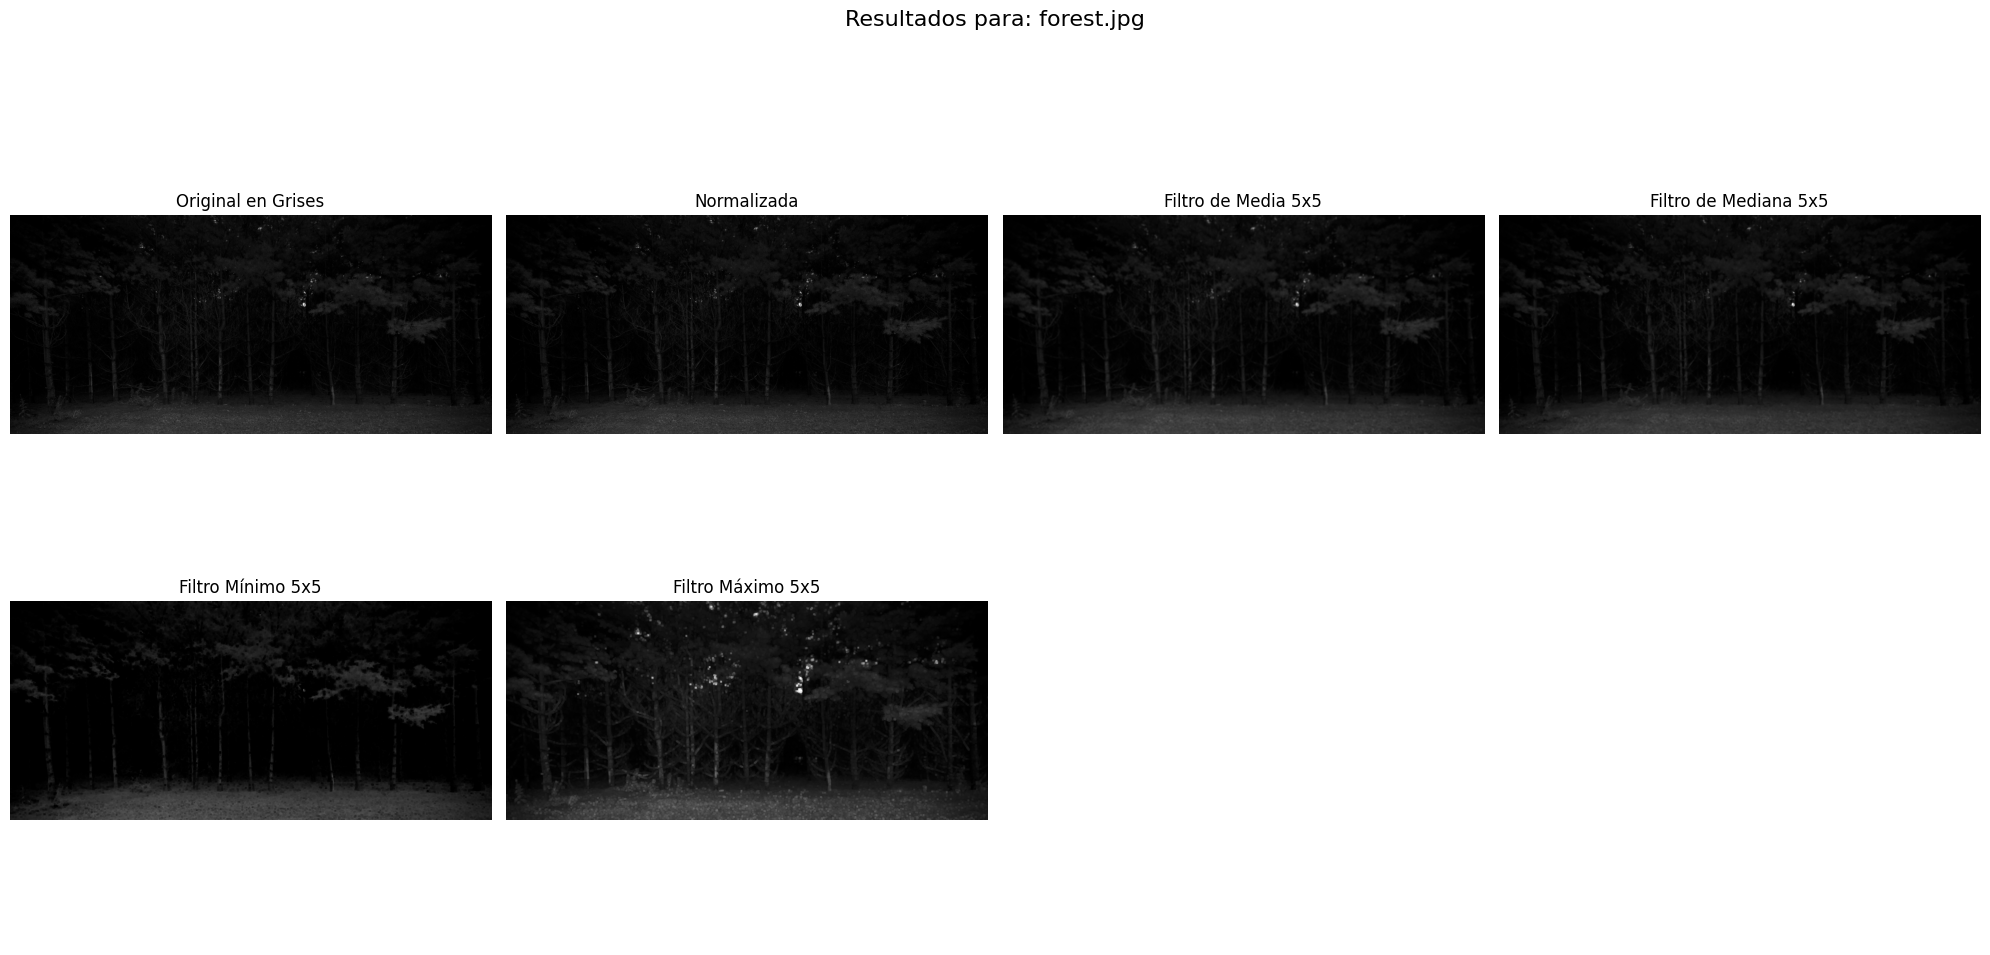



--- Procesando Imagen: papyrus.png ---
1. Valor mínimo de gris: 1
   Valor máximo de gris: 255
2. Contraste ajustado por normalización.
3. Filtros de media y mediana aplicados con kernel 5x5.
4. Función SubMatriz definida.
5. Aplicando filtros mínimo y máximo con kernel 5x5. Esto puede tardar... ¡Hecho!


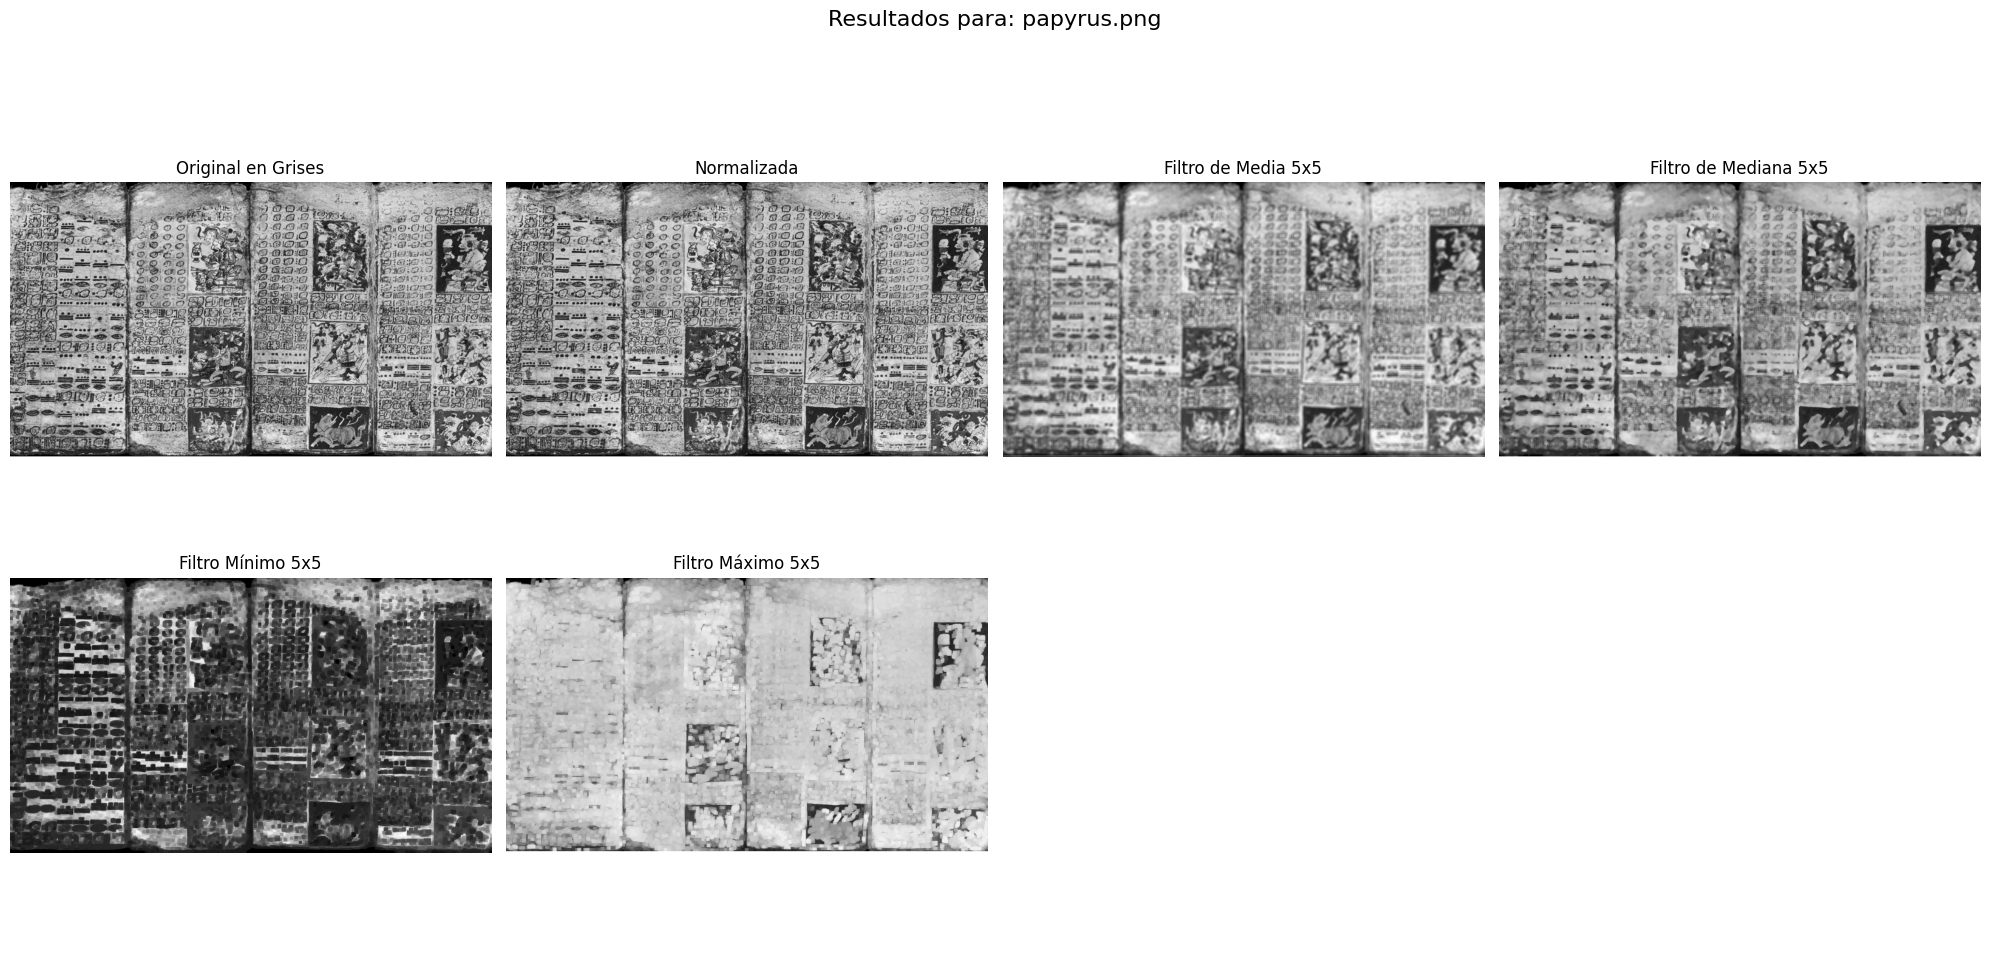

In [5]:
for nombre_img in nombres_imagenes:
    # Construir la ruta completa del archivo
    ruta_img = os.path.join(ruta_carpeta, nombre_img)
    
    # Cargar la imagen original en color
    img_color = cv2.imread(ruta_img)
    # Convertir a escala de grises
    img_gris = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    
    print(f"--- Procesando Imagen: {nombre_img} ---")
    
    # 1. ¿Cuál es el valor máximo y mínimo de gris en las imágenes?
    min_val = np.min(img_gris)
    max_val = np.max(img_gris)
    print(f"1. Valor mínimo de gris: {min_val}")
    print(f"   Valor máximo de gris: {max_val}")

    # 2. Ajuste el contraste de las imágenes mediante la normalización.
    # Normaliza el rango de píxeles a 0-255
    img_normalizada = cv2.normalize(img_gris, None, 0, 255, cv2.NORM_MINMAX)
    print("2. Contraste ajustado por normalización.")
    
    # 3. Aplique el filtrado de la media y de la mediana.
    img_media = cv2.blur(img_gris, (KERNEL_SIZE, KERNEL_SIZE))
    img_mediana = cv2.medianBlur(img_gris, KERNEL_SIZE)
    print(f"3. Filtros de media y mediana aplicados con kernel {KERNEL_SIZE}x{KERNEL_SIZE}.")
    
    # 4. (Función SubMatriz definida anteriormente)
    print("4. Función SubMatriz definida.")
    
    # 5. Utilizando la funcion SubMatriz aplique los filtros máximo y mínimo.
    print(f"5. Aplicando filtros mínimo y máximo con kernel {KERNEL_SIZE}x{KERNEL_SIZE}. Esto puede tardar...", end='')
    img_min = aplicar_filtro_manual(img_gris, KERNEL_SIZE, 'min')
    img_max = aplicar_filtro_manual(img_gris, KERNEL_SIZE, 'max')
    print(" ¡Hecho!")
    
    # 6. Reporte (Resultados visuales)
    fig, axs = plt.subplots(2, 4, figsize=(20, 10))
    fig.suptitle(f'Resultados para: {nombre_img}', fontsize=16)
    
    # Fila 1
    axs[0, 0].imshow(img_gris, cmap='gray')
    axs[0, 0].set_title('Original en Grises')
    axs[0, 0].axis('off')
    
    axs[0, 1].imshow(img_normalizada, cmap='gray')
    axs[0, 1].set_title('Normalizada')
    axs[0, 1].axis('off')
    
    axs[0, 2].imshow(img_media, cmap='gray')
    axs[0, 2].set_title(f'Filtro de Media {KERNEL_SIZE}x{KERNEL_SIZE}')
    axs[0, 2].axis('off')
    
    axs[0, 3].imshow(img_mediana, cmap='gray')
    axs[0, 3].set_title(f'Filtro de Mediana {KERNEL_SIZE}x{KERNEL_SIZE}')
    axs[0, 3].axis('off')
    
    # Fila 2
    axs[1, 0].imshow(img_min, cmap='gray')
    axs[1, 0].set_title(f'Filtro Mínimo {KERNEL_SIZE}x{KERNEL_SIZE}')
    axs[1, 0].axis('off')
    
    axs[1, 1].imshow(img_max, cmap='gray')
    axs[1, 1].set_title(f'Filtro Máximo {KERNEL_SIZE}x{KERNEL_SIZE}')
    axs[1, 1].axis('off')
    
    # Ocultar ejes no utilizados
    axs[1, 2].axis('off')
    axs[1, 3].axis('off')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    print("\n" + "="*60 + "\n")
    

## 6. Reporte: Procedimientos, Resultados y Conclusiones

### Procedimientos

Para cada una de las cuatro imágenes, se siguió un proceso estandarizado para mejorar su calidad y analizar el efecto de diferentes filtros espaciales. El tamaño del kernel para todos los filtros se estableció en **5x5** para asegurar que el efecto de la vecindad de píxeles fuera notable pero sin degradar excesivamente la imagen.

1.  **Carga y Conversión a Grises**: Las imágenes se cargaron en formato BGR y se convirtieron inmediatamente a escala de grises. Este es un paso fundamental, ya que los filtros de intensidad operan sobre un único canal.

2.  **Análisis de Rango Dinámico**: Se calcularon los valores de intensidad mínimo y máximo de cada imagen en escala de grises. Esto es crucial para entender si la imagen aprovecha todo el rango dinámico disponible (usualmente de 0 a 255).

3.  **Normalización**: Se aplicó una normalización de tipo `MINMAX`. Esta técnica reescala los valores de intensidad para que el mínimo original se convierta en 0, el máximo original en 255 y los valores intermedios se distribuyan linealmente. El objetivo es expandir el histograma y mejorar el contraste visual, haciendo que los detalles en zonas muy oscuras o muy claras sean más visibles.

4.  **Filtro de la Media (Desenfoque)**: Se aplicó un filtro de la media, que reemplaza el valor de cada píxel por el promedio de los valores de su vecindad (definida por el kernel de 5x5). Este filtro es útil para suavizar la imagen y reducir el ruido de tipo gaussiano, aunque tiene el inconveniente de desenfocar los bordes y detalles finos.

5.  **Filtro de la Mediana**: Se aplicó un filtro de la mediana, que reemplaza el valor de cada píxel por la mediana de los valores de su vecindad. Es un filtro no lineal muy efectivo para eliminar ruido de tipo "sal y pimienta" (píxeles blancos y negros aislados), y tiene la ventaja sobre el filtro de la media de preservar mejor los bordes.

6.  **Filtros Mínimo y Máximo**: Se implementaron manualmente estos filtros utilizando la función `SubMatriz`. 
    -   El **filtro mínimo** reemplaza cada píxel por el valor más bajo en su vecindad. Esto tiene el efecto de erosionar o encoger las regiones brillantes y expandir las oscuras. Es útil para resaltar los detalles más oscuros.
    -   El **filtro máximo** hace lo contrario: reemplaza cada píxel por el valor más alto de su vecindad. Esto dilata o agranda las regiones brillantes y encoge las oscuras. Sirve para destacar los elementos más claros.

### Resultados

Los resultados visuales se mostraron en las gráficas generadas para cada imagen. A continuación, se describen los efectos observados:

-   **Normalización**: En todas las imágenes, especialmente en `chest_xray.jpg` y `papyrus.png` que tenían rangos dinámicos comprimidos, la normalización mejoró significativamente el contraste. Los detalles se volvieron mucho más claros y la imagen en general se ve más nítida.

-   **Filtro de Media**: Produjo un efecto de desenfoque generalizado en todas las imágenes. Aunque suavizó las texturas, también provocó una pérdida de detalles finos, como los pelos en la imagen `cat.jpg` o las hojas en `forest.jpg`.

-   **Filtro de Mediana**: Fue efectivo para suavizar las imágenes sin el desenfoque tan pronunciado del filtro de media. Preservó los bordes de manera más efectiva. Su efecto es sutil pero beneficioso para una reducción de ruido que no destruya la estructura de la imagen.

-   **Filtro Mínimo**: Oscureció notablemente todas las imágenes. En `chest_xray.jpg`, las áreas oscuras (pulmones) se expandieron, mientras que en `papyrus.png`, los trazos oscuros de la escritura se hicieron más gruesos.

-   **Filtro Máximo**: Aclaró todas las imágenes, expandiendo las áreas brillantes. En la radiografía, el hueso y las regiones más densas se hicieron más prominentes. En la imagen del gato, los bigotes y otras zonas claras se engrosaron.

### Conclusiones

Este experimento demuestra que no existe una única "mejor" técnica de mejora de imagen; la elección depende del objetivo específico y del tipo de imagen.

1.  **La normalización es un primer paso excelente y casi siempre recomendable** para mejorar el contraste cuando el rango dinámico de una imagen está poco aprovechado.

2.  **El filtro de la media es una herramienta simple para suavizar**, pero debe usarse con precaución debido a su fuerte efecto de desenfoque. Es más adecuado para preprocesamiento donde la reducción de ruido es más importante que la conservación de detalles.

3.  **El filtro de la mediana es superior al de la media para la eliminación de ruido impulsivo** (sal y pimienta) y es preferible cuando se necesita preservar los bordes y la estructura general de la imagen.

4.  **Los filtros mínimo y máximo (operadores morfológicos de erosión y dilatación)** no son filtros de "mejora" en el sentido tradicional, sino herramientas para modificar la morfología de los objetos en la imagen. Son fundamentales en tareas como la segmentación de imágenes, la detección de bordes o el realce de características específicas (oscuras o claras).